In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('5_task_1.csv')
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [ ]:
for i in df.columns:
  print(df[i].unique())

[16046 18712  3268 ...  5054 10254  5692]
['A', 'B', 'C']
Categories (3, object): ['A', 'B', 'C']
[14 41 30 37 38 34 24 20 35 28 40 26 29 45 25 22 13 16 18 39 33 21 27 48
 12 50 23 15 32 36 17 31 44 51 42 19 11 57 55  5 43  7 47 49  8 10 46 56
  9  6 -3 -2 58  4  1 61 52  2  0 53 54 -6  3 62 -5 60 63 -1 -4 59 64 65
 67 66 70 68 75 69 72 71 -7]


In [ ]:
df['group'] = df['group'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      30000 non-null  int64   
 1   group   30000 non-null  category
 2   events  30000 non-null  int64   
dtypes: category(1), int64(2)
memory usage: 498.3 KB


<Axes: xlabel='events', ylabel='Count'>

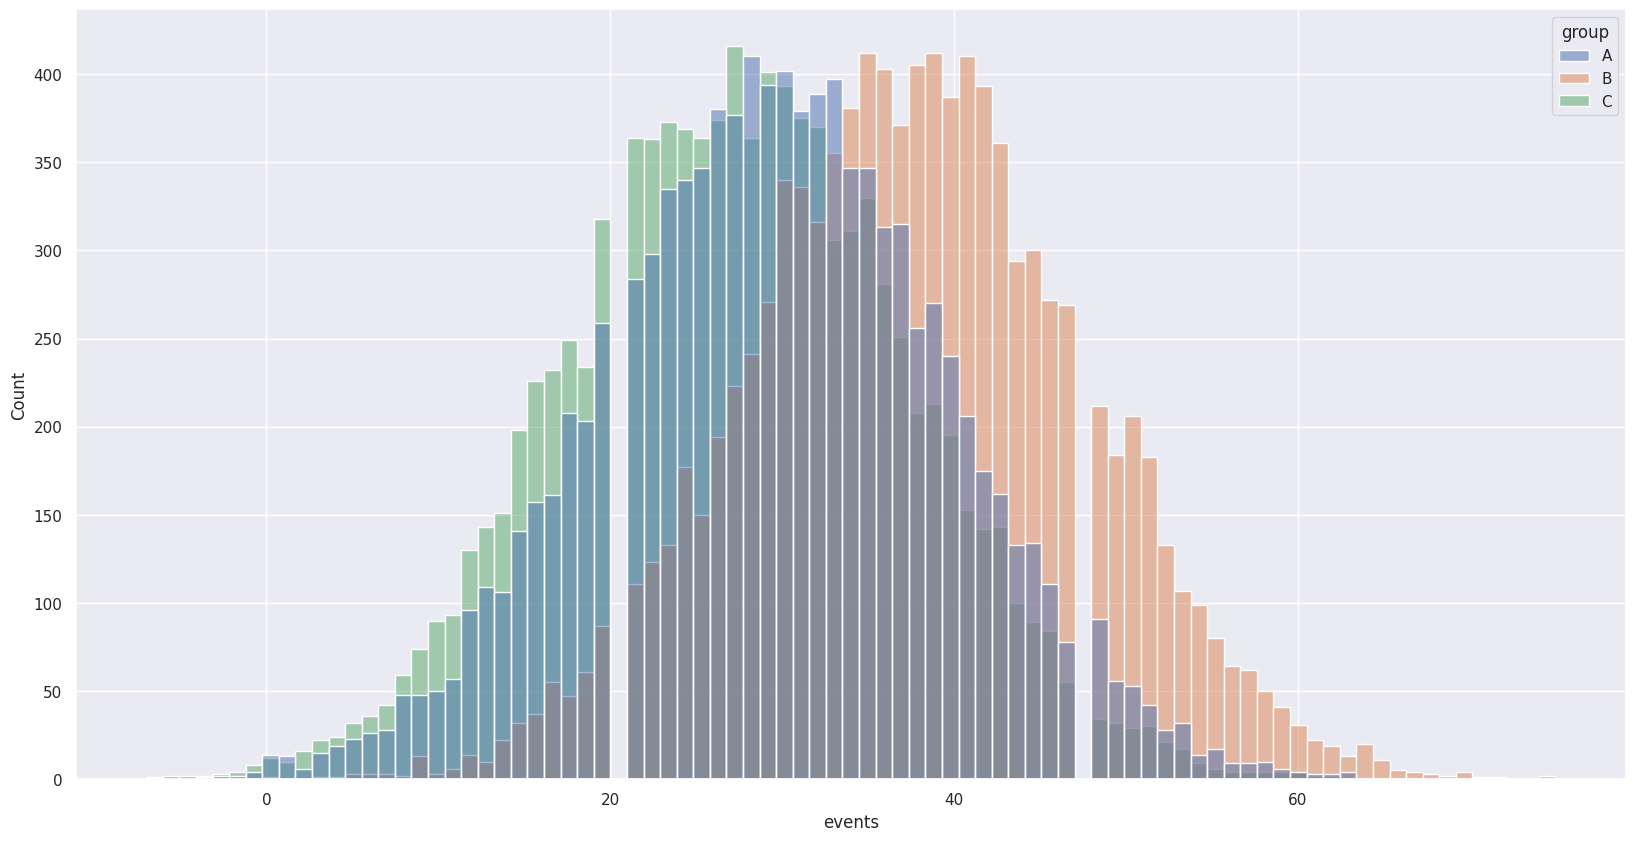

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data = df, x = df['events'], hue = 'group')

In [ ]:
from scipy import stats #проверим группы на нормальность распределения перед дисп. анализом, однако визуально графики похожи на нормальное распределение, и т.к кол-во наблюдений очень велико, могли бы пренебречь
A = df[df['group'] == 'A']
B = df[df['group'] == 'B']
C = df[df['group'] == 'C']
q = [A, B, C]
for i in q:
  print(f'group {i.group.unique()}')
  print(stats.normaltest(i.events))
#тест говорит, что распределение нормальное, проверим визуально

group ['A']
Categories (3, object): ['A', 'B', 'C']
NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
group ['B']
Categories (3, object): ['A', 'B', 'C']
NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
group ['C']
Categories (3, object): ['A', 'B', 'C']
NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

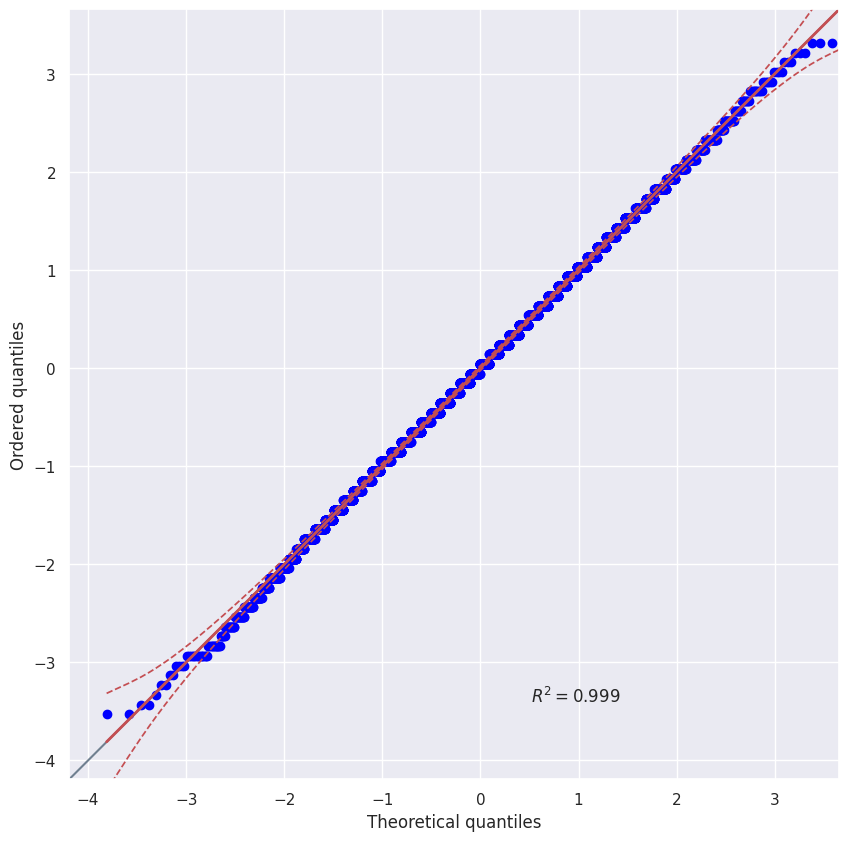

In [ ]:
pg.qqplot(A.events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

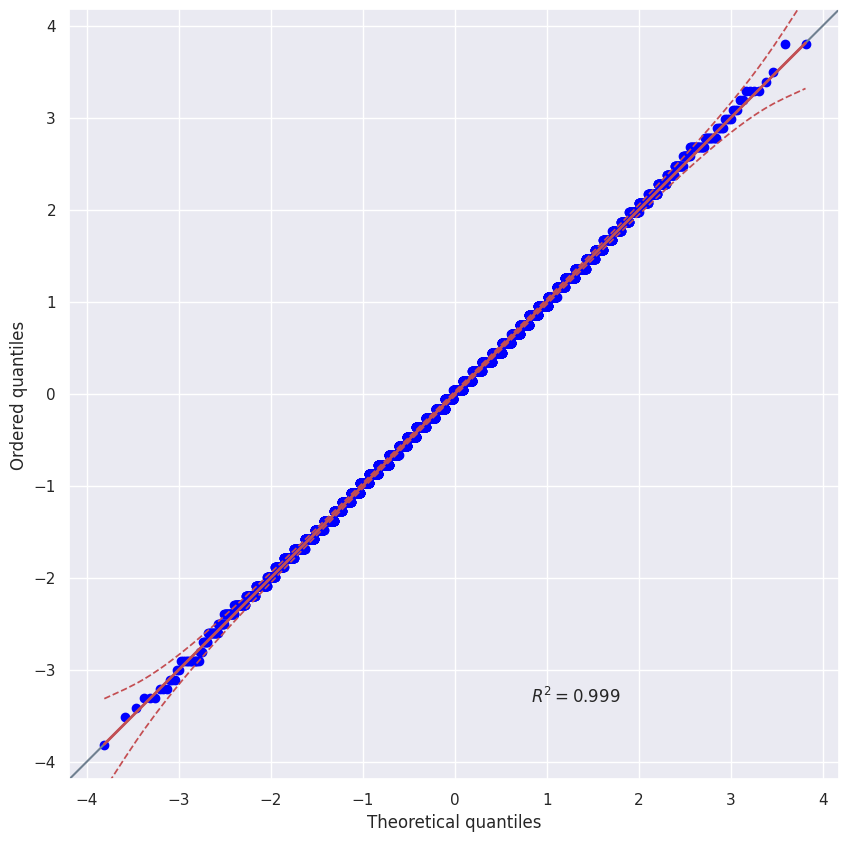

In [ ]:
pg.qqplot(B.events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

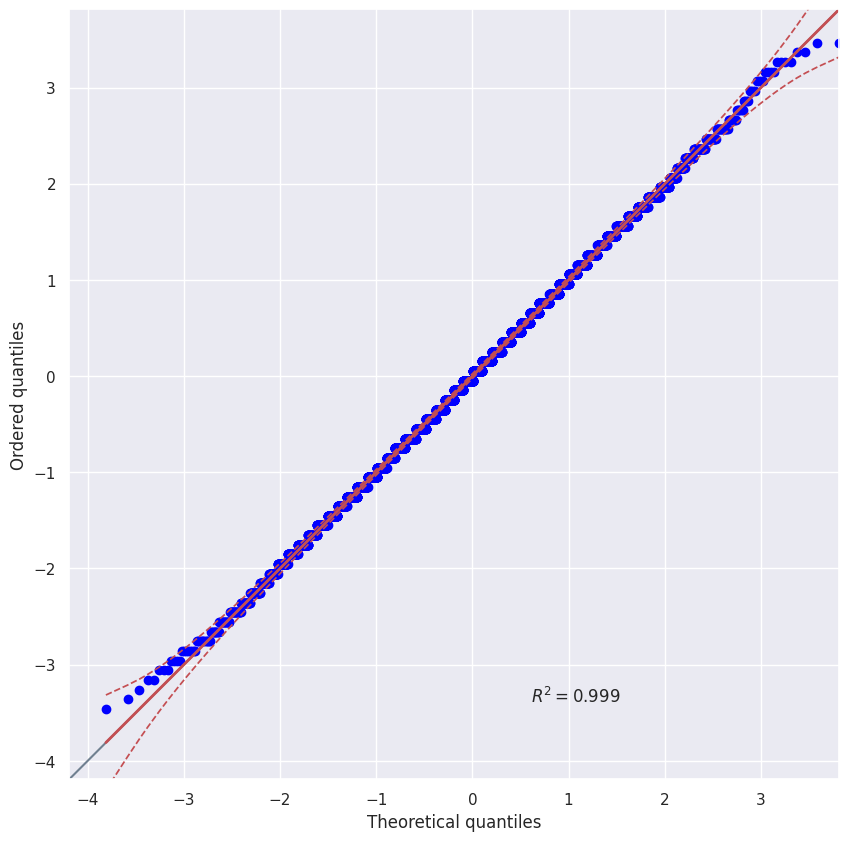

In [ ]:
pg.qqplot(C.events)

In [ ]:
#проверим равенство дисперсий в группах
stats.levene(A.events, B.events, C.events) #дисперсии равны

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [ ]:
#для сравнения групп можем использовать дисперсионный анализ
from scipy.stats import f_oneway
f_oneway(A.events, B.events, C.events) #p_val < 0.05 -> группы различны

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

<Axes: xlabel='group', ylabel='events'>

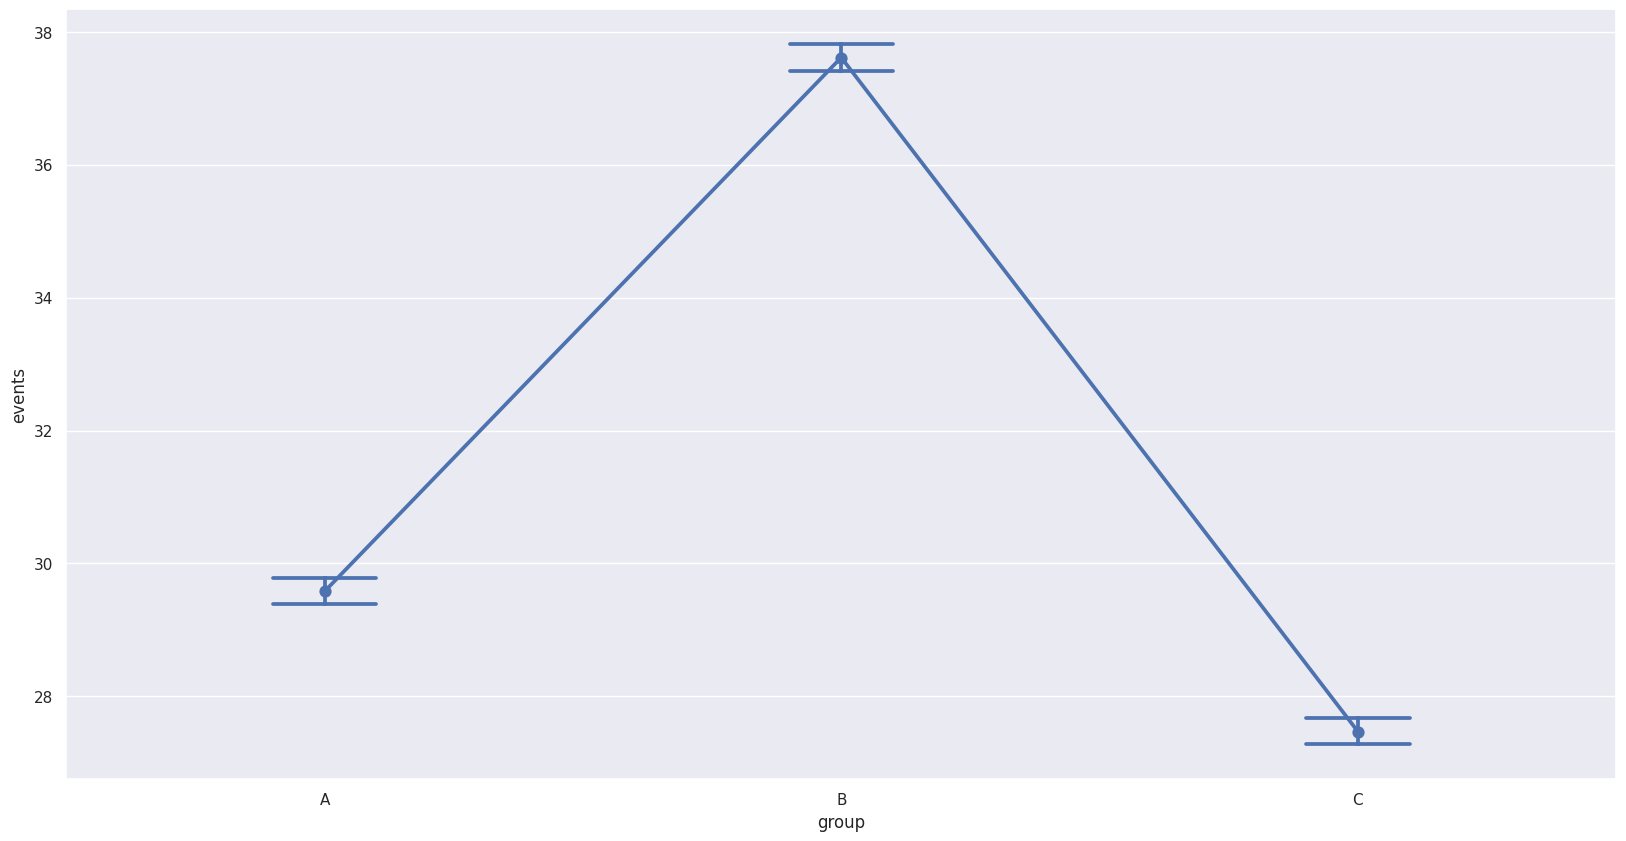

In [ ]:
sns.pointplot(df, x = 'group', y = 'events', capsize = .2) #судя по доверительным интервалам все три группы значимо отличаются между собой. Проведем попарные t-test


In [ ]:
from scipy.stats import ttest_ind
print(ttest_ind(A.events, B.events))
print(ttest_ind(A.events, C.events))
print(ttest_ind(B.events, C.events)) #различия стат. значимы


TtestResult(statistic=-57.01113423437213, pvalue=0.0, df=19998.0)
TtestResult(statistic=14.886135128440298, pvalue=7.500261656295871e-50, df=19998.0)
TtestResult(statistic=72.42022029192773, pvalue=0.0, df=19998.0)


In [ ]:
from scipy.stats import tukey_hsd
res = tukey_hsd(A.events, B.events, C.events)
print(res) #аналогично различия стат. значимы -> между группами есть разница

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -8.034     0.000    -8.364    -7.704
 (0 - 2)      2.109     0.000     1.779     2.440
 (1 - 0)      8.034     0.000     7.704     8.364
 (1 - 2)     10.143     0.000     9.813    10.474
 (2 - 0)     -2.109     0.000    -2.440    -1.779
 (2 - 1)    -10.143     0.000   -10.474    -9.813



In [ ]:
df1 = pd.read_csv('5_task_2.csv')
df1

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


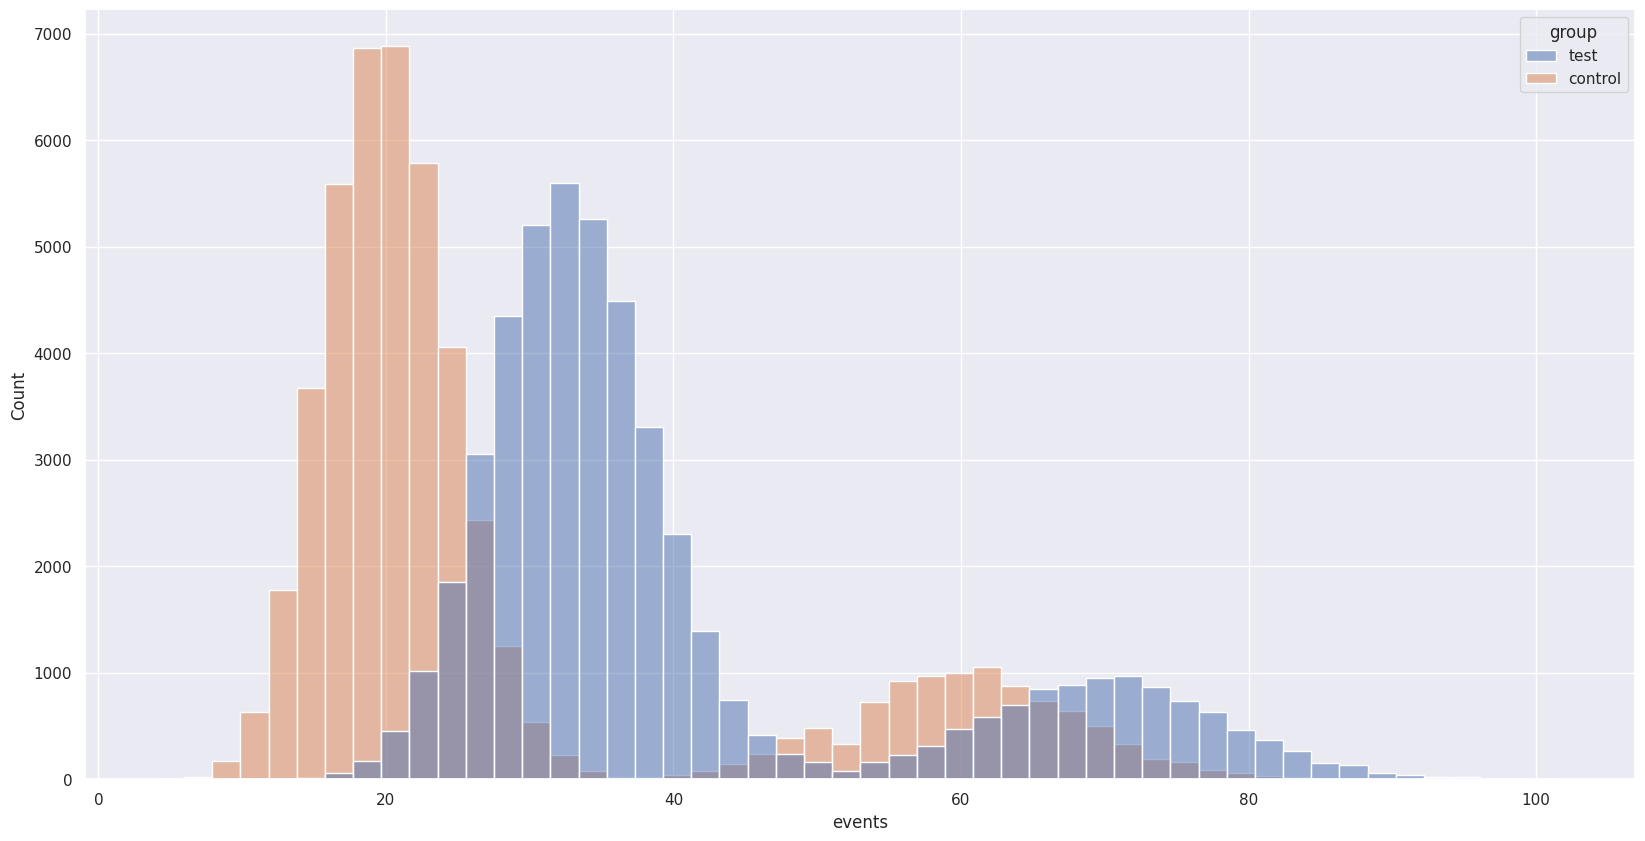

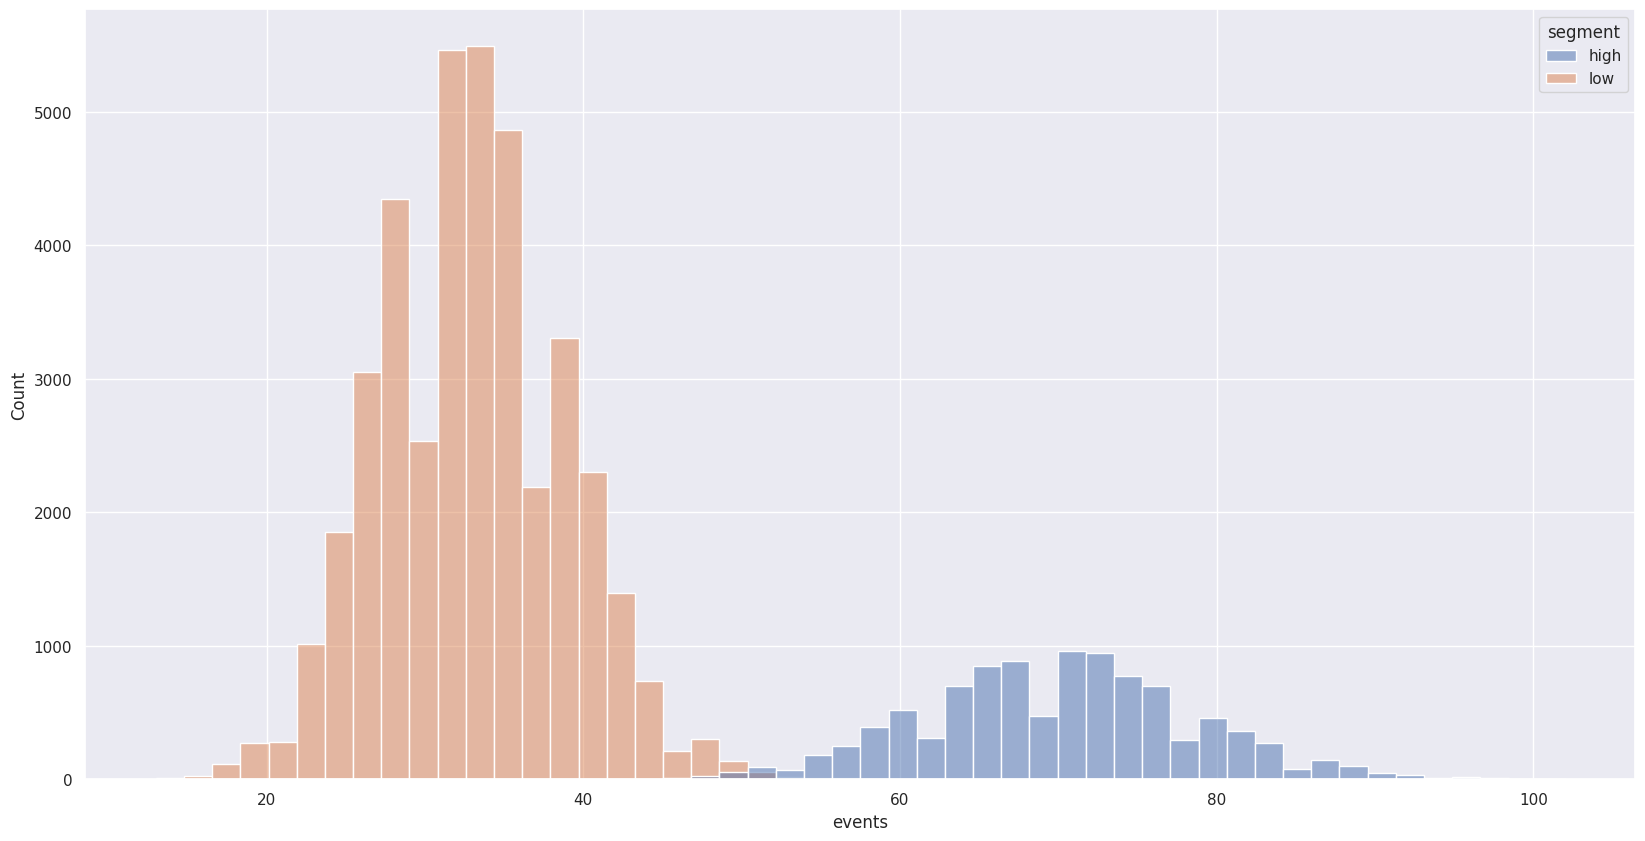

<Axes: xlabel='events', ylabel='Count'>

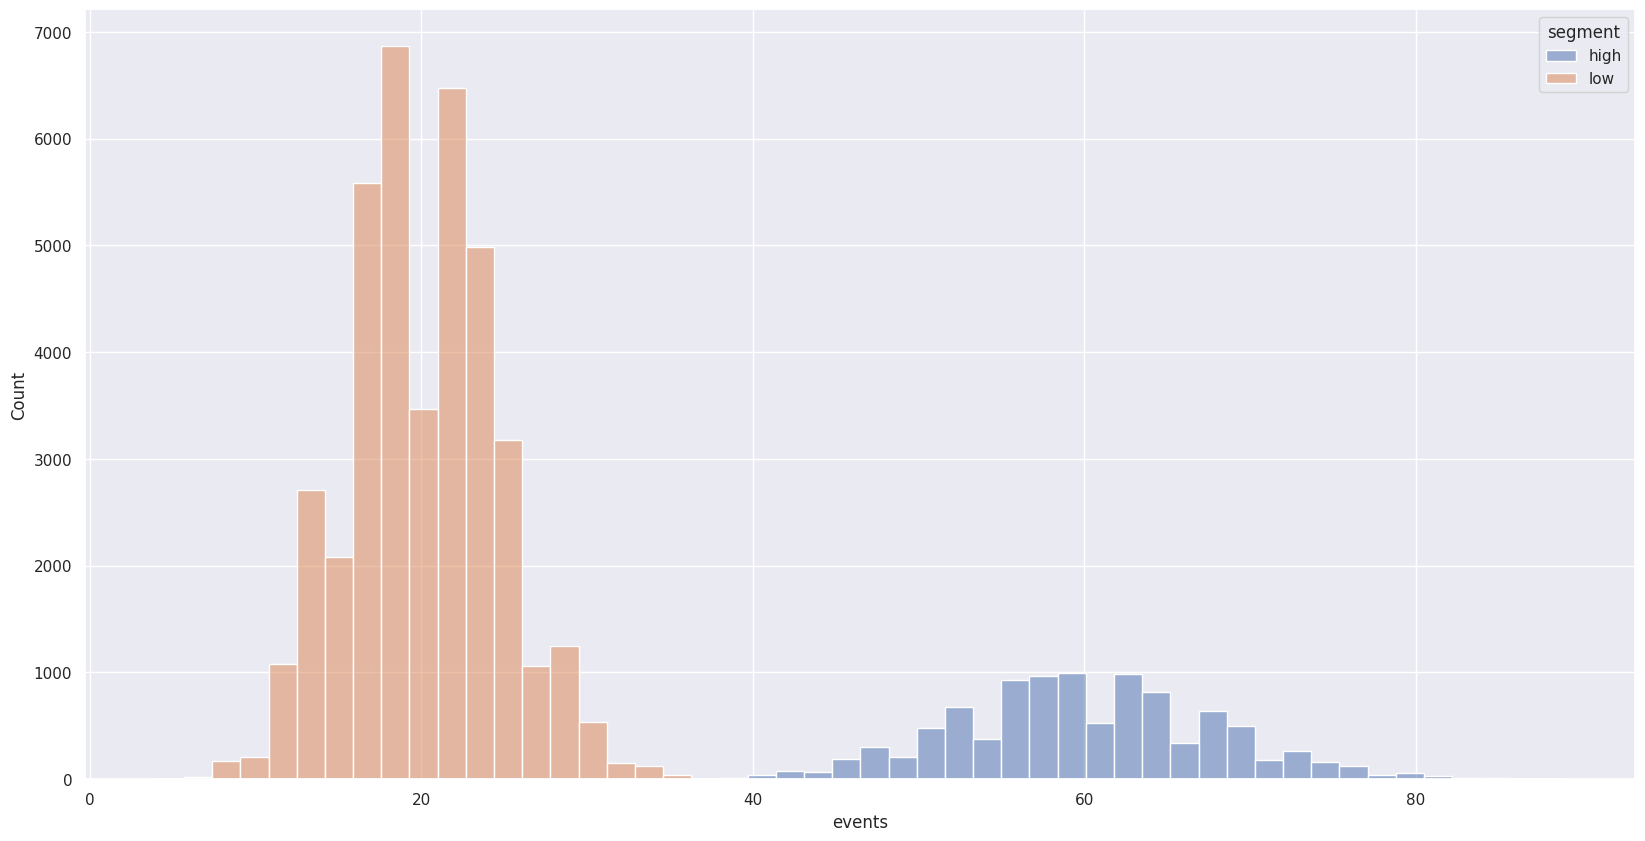

In [ ]:
sns.histplot(df1, x = 'events', hue = 'group', bins = 50)
plt.show()
ax1 = plt.axes()
sns.histplot(df1[df1['group'] == 'test'], x = 'events', hue = 'segment', bins = 50)
plt.show()
sns.histplot(df1[df1['group'] == 'control'], x = 'events', hue = 'segment', bins = 50)

In [ ]:
# у нас много наблюдений при симметричном распределении -> для анализа с фактором сегмент не нужна проверка на нормальность распределения
# однако при факторе group данные не симметрично распределены, можно использовать непараметрический аналог ANOVA, попробуем двухфакторный ANOVA, будем отталкиваться от результата
print(pg.anova(data = df1, dv = 'events', between = ['segment', 'group'], ss_type = 2))
print(pg.anova(data = df1, dv = 'events', between = ['segment', 'group'], ss_type = 3))

            Source            SS       DF            MS              F  \
0          segment  2.362480e+07      1.0  2.362480e+07  689756.377484   
1            group  3.837195e+06      1.0  3.837195e+06  112031.864119   
2  segment * group  3.664244e+04      1.0  3.664244e+04    1069.823273   
3         Residual  3.424956e+06  99996.0  3.425093e+01            NaN   

           p-unc       np2  
0   0.000000e+00  0.873383  
1   0.000000e+00  0.528383  
2  2.060261e-233  0.010585  
3            NaN       NaN  
            Source            SS       DF            MS              F  \
0          segment  2.362480e+07      1.0  2.362480e+07  689756.377484   
1            group  2.109023e+06      1.0  2.109023e+06   61575.642696   
2  segment * group  3.664244e+04      1.0  3.664244e+04    1069.823273   
3         Residual  3.424956e+06  99996.0  3.425093e+01            NaN   

           p-unc       np2  
0   0.000000e+00  0.873383  
1   0.000000e+00  0.381104  
2  2.060261e-233  0.010585

<Axes: xlabel='group', ylabel='events'>

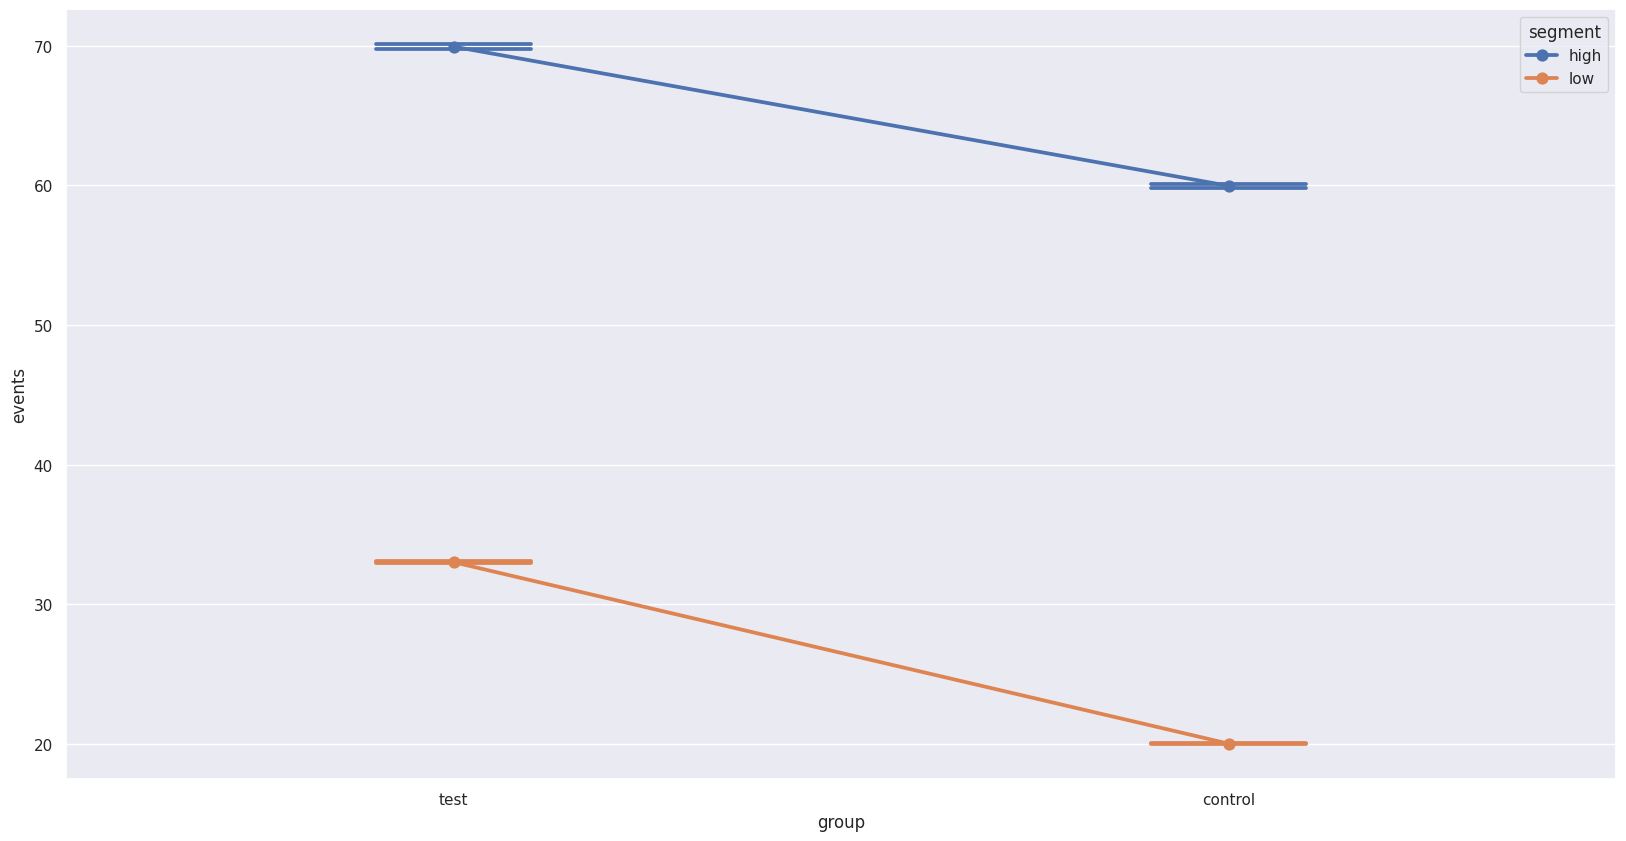

In [ ]:
sns.pointplot(df1, x = 'group', y = 'events', hue='segment', capsize = .2)
#данные отличаются по всем факторам
#судя по результатам нет смысла использовать непараметрический аналог ANOVA